## 1. Importing Libraries

In [1]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np

# visualisasi distribusi untuk fitur kategorikal menggunakan bar chart
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.plot import plot_missing_value

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe

# Data Resampling
from sklearn.utils import resample

#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#metric
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, classification_report

# Ensembling
# from mlxtend.classifier import StackingCVClassifier

# import warnings
# warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

## 2. Import Dataset

In [2]:
pd.options.display.max_columns = 100

In [3]:
# Reading and converting the data into a pandas dataframe
df = pd.read_excel("C:/Users/ASUS/JupyterNotebook/Machine Learning/Coronary-Heart-Disease-Prediction-master/CardiacPrediction.xlsx") 

In [4]:
# Calculating the dimensions of the dataset
df.head() 

,SEQN,Gender,Age,Annual_Family_Income,Ratio_Family_Income_Poverty,X60_sec_pulse,Systolic,Diastolic,Weight,Height,Body_Mass_Index,White_Blood_Cells,Lymphocyte,Monocyte,Eosinophils,Basophils,Red_Blood_Cells,Hemoglobin,Mean_Cell_Vol,Mean_Cell_Hgb_Conc.,Mean_cell_Hemoglobin,Platelet_count,Mean_Platelet_Vol,Segmented_Neutrophils,Hematocrit,Red_Cell_Distribution_Width,Albumin,ALP,AST,ALT,Cholesterol,Creatinine,Glucose,GGT,Iron,LDH,Phosphorus,Bilirubin,Protein,Uric_Acid,Triglycerides,Total_Cholesterol,LDL,HDL,Glycohemoglobin,Vigorous_work,Moderate_work,Health_Insurance,Diabetes,Blood_Rel_Diabetes,Blood_Rel_Stroke,CoronaryHeartDisease
0,2,1,77,8,5.00,68,98,56,75.4,174.0,24.90,7.6,21.1,7.1,4.4,0.5,4.73,14.1,88.5,29.7,33.6,214.0,7.7,66.8,41.8,13.7,45,62,19,16,5.25,61.9,4.330,20,11.28,140,1.066,12.0,72.0,362.8,1.298,5.56,3.5210,1.39,4.7,3,3,1,2,2,2,0
1,5,1,49,11,5.00,66,122,83,92.5,178.3,29.10,5.9,37.8,6.2,3.4,0.4,5.13,14.5,84.9,28.3,33.3,209.0,10.4,52.2,43.6,13.1,45,63,22,28,7.16,70.7,5.273,34,24.54,133,1.033,8.6,73.0,404.5,3.850,7.21,4.2050,1.08,5.5,1,1,1,2,2,2,0
2,12,1,37,11,4.93,64,174,99,99.2,180.0,30.62,10.2,23.7,9.0,3.2,0.6,5.76,16.0,83.5,27.8,33.3,357.0,7.9,63.7,48.1,13.6,47,63,17,35,3.90,88.4,4.163,32,11.28,131,1.130,6.8,72.0,339.0,1.581,4.03,2.2595,0.98,5.2,2,1,1,2,1,1,0
3,13,1,70,3,1.07,102,130,66,63.6,157.7,25.57,11.6,13.1,3.8,0.4,0.4,5.53,16.8,91.1,30.3,33.3,228.0,8.8,82.4,50.4,14.4,40,103,24,35,7.94,61.9,7.882,24,12.18,181,0.904,8.6,66.0,410.4,3.635,8.12,5.0225,1.28,7.6,3,3,1,1,1,2,0
4,14,1,81,5,2.67,72,136,61,75.5,166.2,27.33,9.1,29.8,5.6,1.7,0.4,5.32,16.6,90.4,31.3,34.5,160.0,9.0,62.5,48.1,12.4,45,110,23,18,4.42,88.4,6.384,24,11.82,150,1.033,10.3,79.0,368.8,0.756,4.50,3.0820,1.04,5.8,1,1,1,2,2,2,0


## 3. Exploratory Data Analysis

In [5]:
df = df.drop(columns=['SEQN'])

In [6]:
len(df.columns)

51

In [7]:
df.dtypes

Gender                           int64
Age                              int64
Annual_Family_Income             int64
Ratio_Family_Income_Poverty    float64
X60_sec_pulse                    int64
Systolic                         int64
Diastolic                        int64
Weight                         float64
Height                         float64
Body_Mass_Index                float64
White_Blood_Cells              float64
Lymphocyte                     float64
Monocyte                       float64
Eosinophils                    float64
Basophils                      float64
Red_Blood_Cells                float64
Hemoglobin                     float64
Mean_Cell_Vol                  float64
Mean_Cell_Hgb_Conc.            float64
Mean_cell_Hemoglobin           float64
Platelet_count                 float64
Mean_Platelet_Vol              float64
Segmented_Neutrophils          float64
Hematocrit                     float64
Red_Cell_Distribution_Width    float64
Albumin                  

In [8]:
# kondisi target yang dimiliki
df.CoronaryHeartDisease.value_counts()

0    35571
1     1508
Name: CoronaryHeartDisease, dtype: int64

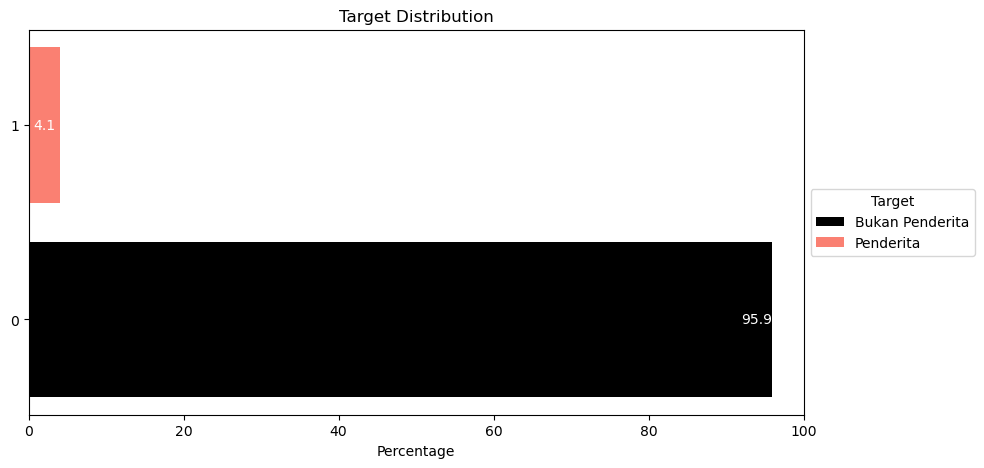

In [9]:
# Calculate the distribution
target_counts = df['CoronaryHeartDisease'].value_counts(normalize=True) * 100
categories = target_counts.index.map(str)
counts = target_counts.values
colors = ['black', 'salmon']

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(categories, counts, color=colors)

# Add the text on the bars
for bar in bars:
    width = bar.get_width()
    label_position = width - 2 if width > 1 else width + 2
    ax.text(label_position, bar.get_y() + bar.get_height()/2, f'{width:.1f}', 
            va='center', ha='center', color='white')

# Set labels
ax.set_xlabel('Percentage')
ax.set_title('Target Distribution')
ax.set_xlim(0, 100)

# Add legend
ax.legend(bars, ['Bukan Penderita', 'Penderita'], title='Target', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


### Hubungan fitur-fitur numerical dengan target

37079


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

<AxesSubplot:xlabel='Systolic', ylabel='Density'>

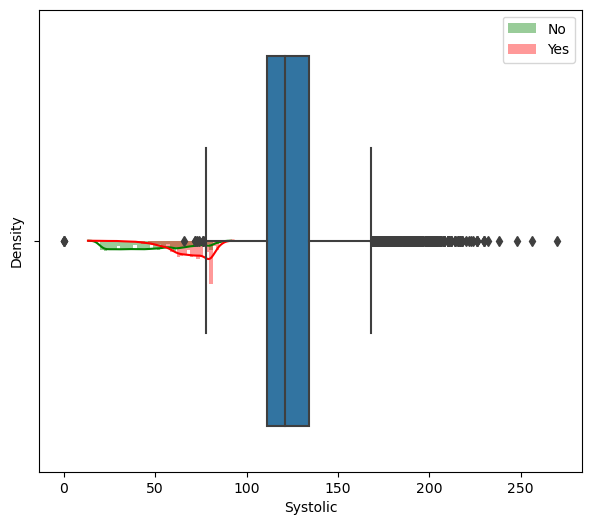

In [63]:
n = len(df['Age'])
print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Age'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Age'].max() - df['Age'].min()) / bin_width_fd)


plt.figure(figsize=(7, 6))
sns.distplot(df.Age[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Age[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

sns.boxplot(df['Systolic'])

# # Mengelompokkan data berdasarkan 'Age' dan menghitung jumlah penderita penyakit jantung
# age_distribution = df.groupby('Age')['CoronaryHeartDisease'].value_counts().unstack()

# # Jumlah penderita penyakit jantung per kelompok umur
# heart_disease_counts = age_distribution[1]  # 1 mungkin mewakili 'Yes' untuk penyakit jantung

# # Menemukan kelompok umur dengan jumlah kasus penyakit jantung terbanyak
# max_disease_age = heart_disease_counts.idxmax()
# max_disease_count = heart_disease_counts.max()

# # Tampilkan umur dan jumlahnya
# max_disease_age, max_disease_count

37079


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


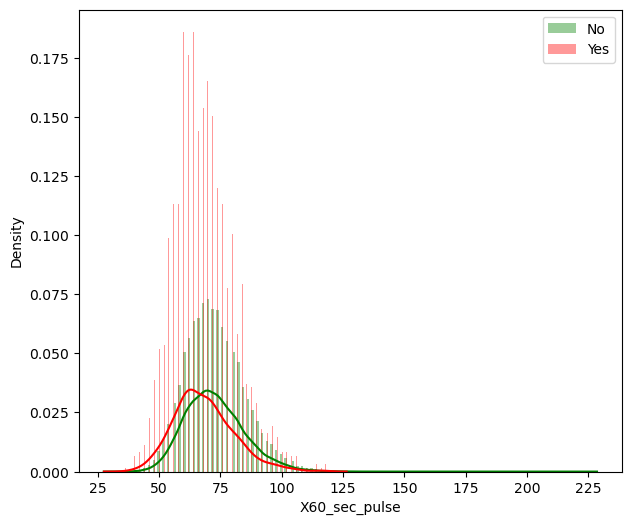

In [11]:
n = len(df['X60_sec_pulse'])
print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['X60_sec_pulse'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['X60_sec_pulse'].max() - df['X60_sec_pulse'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.X60_sec_pulse[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.X60_sec_pulse[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

37079


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


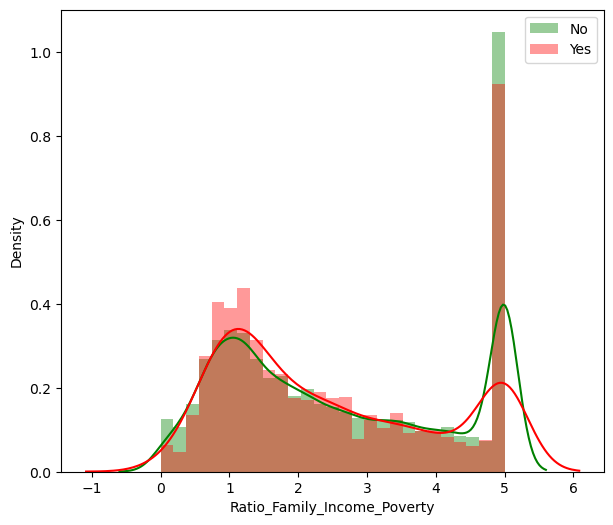

In [12]:
n = len(df['Ratio_Family_Income_Poverty'])
print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Ratio_Family_Income_Poverty'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Ratio_Family_Income_Poverty'].max() - df['Ratio_Family_Income_Poverty'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Ratio_Family_Income_Poverty[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Ratio_Family_Income_Poverty[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

37079


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


There are 11028 people with a systolic blood pressure above 130.


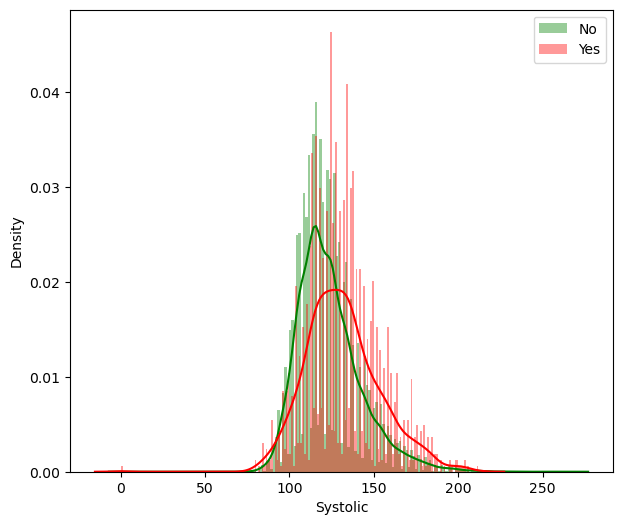

In [13]:
n = len(df['Systolic'])
print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Systolic'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Systolic'].max() - df['Systolic'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Systolic[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Systolic[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

# Count the number of people with systolic blood pressure greater than 130
high_systolic_count = df[df['Systolic'] > 130].shape[0]

print(f"There are {high_systolic_count} people with a systolic blood pressure above 130.")


37079


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


There are 3764 people with a diastolic blood pressure above 85.


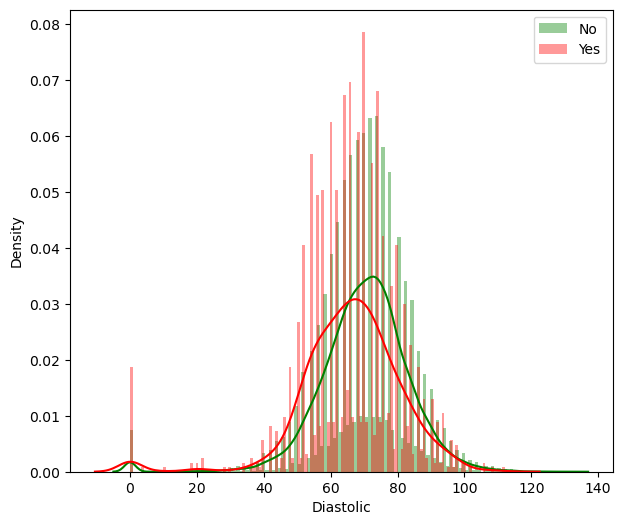

In [14]:
n = len(df['Diastolic'])
print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Diastolic'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Diastolic'].max() - df['Diastolic'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Diastolic[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Diastolic[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

# Count the number of people with systolic blood pressure greater than 130
high_diastolic_count = df[df['Diastolic'] > 85].shape[0]

print(f"There are {high_diastolic_count} people with a diastolic blood pressure above 85.")


37079


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


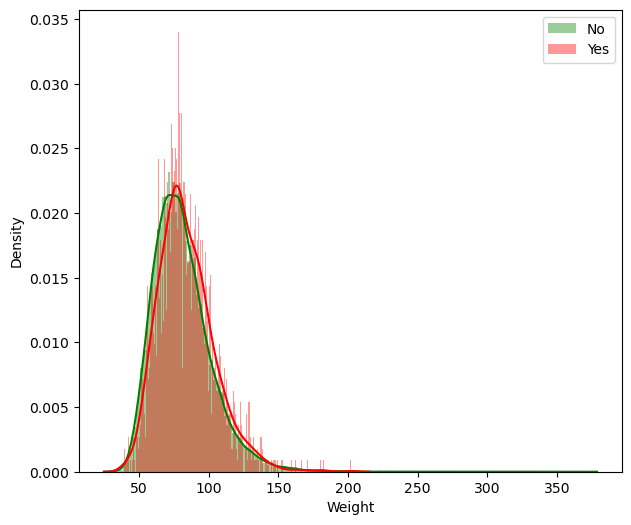

In [15]:
n = len(df['Weight'])
print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Weight'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Weight'].max() - df['Weight'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Weight[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Weight[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

37079


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


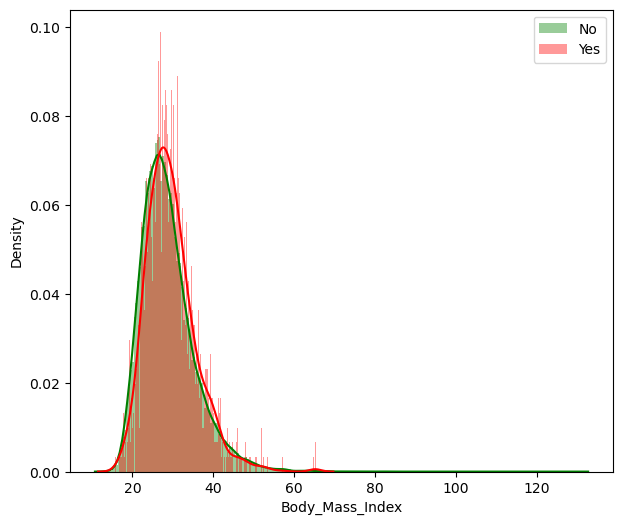

In [16]:
n = len(df['Body_Mass_Index'])
print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Body_Mass_Index'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Body_Mass_Index'].max() - df['Body_Mass_Index'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Body_Mass_Index[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Body_Mass_Index[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

37079


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


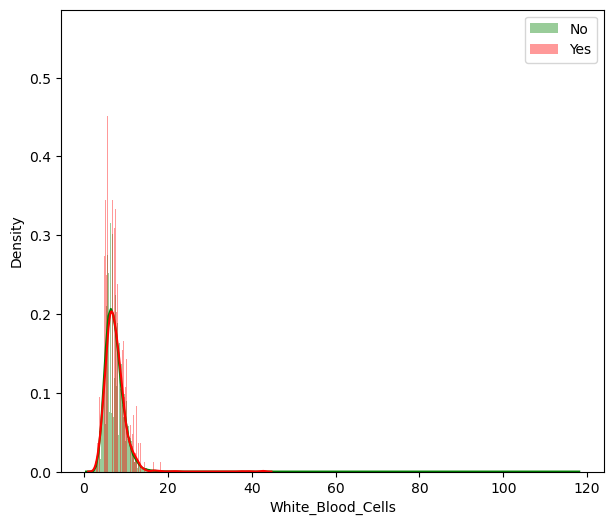

In [17]:
n = len(df['White_Blood_Cells'])
print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['White_Blood_Cells'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['White_Blood_Cells'].max() - df['White_Blood_Cells'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.White_Blood_Cells[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.White_Blood_Cells[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


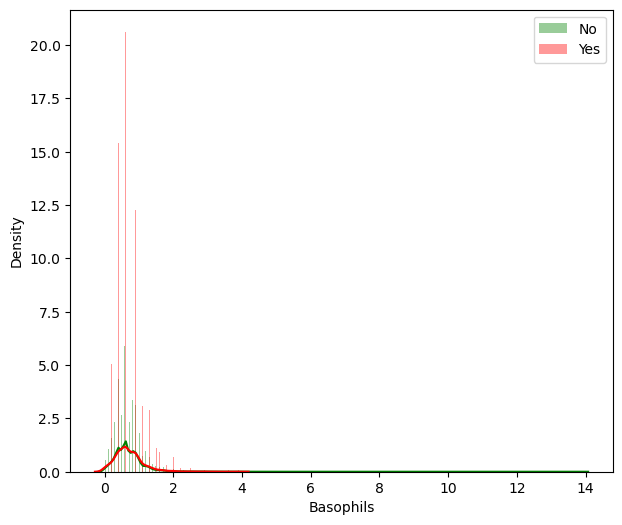

In [18]:
n = len(df['Basophils'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Basophils'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Basophils'].max() - df['Basophils'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Basophils[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Basophils[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


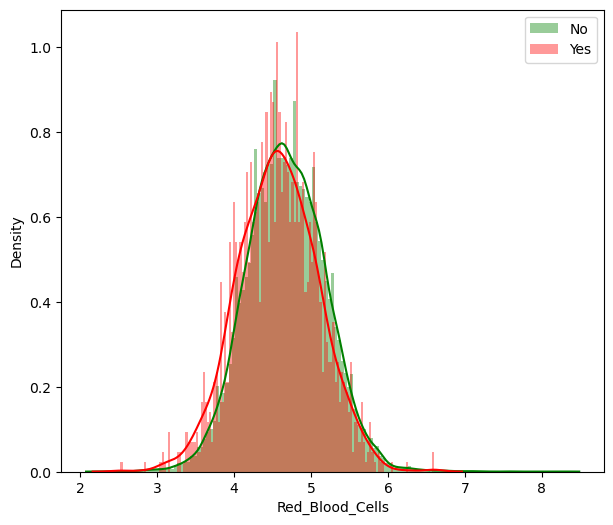

In [19]:
n = len(df['Red_Blood_Cells'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Red_Blood_Cells'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Red_Blood_Cells'].max() - df['Red_Blood_Cells'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Red_Blood_Cells[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Red_Blood_Cells[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


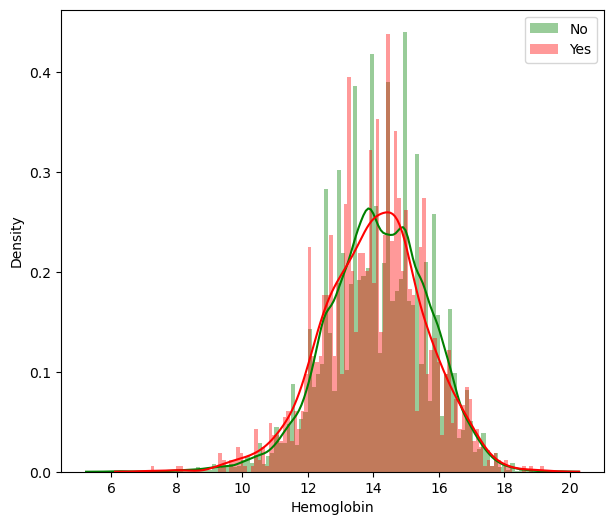

In [20]:
n = len(df['Hemoglobin'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Hemoglobin'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Hemoglobin'].max() - df['Hemoglobin'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Hemoglobin[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Hemoglobin[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


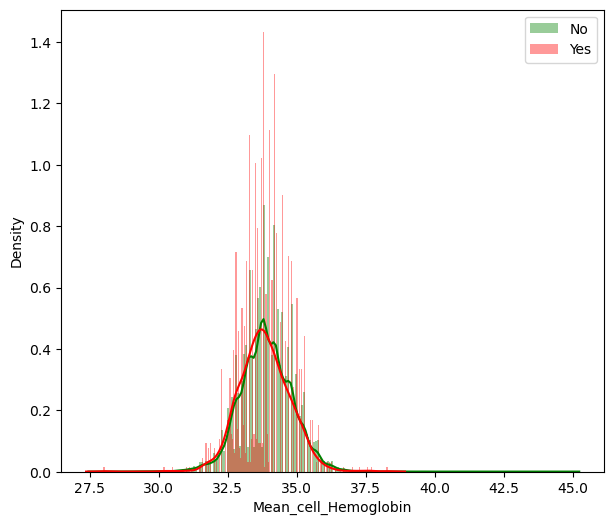

In [21]:
n = len(df['Mean_cell_Hemoglobin'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Mean_cell_Hemoglobin'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Mean_cell_Hemoglobin'].max() - df['Mean_cell_Hemoglobin'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Mean_cell_Hemoglobin[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Mean_cell_Hemoglobin[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


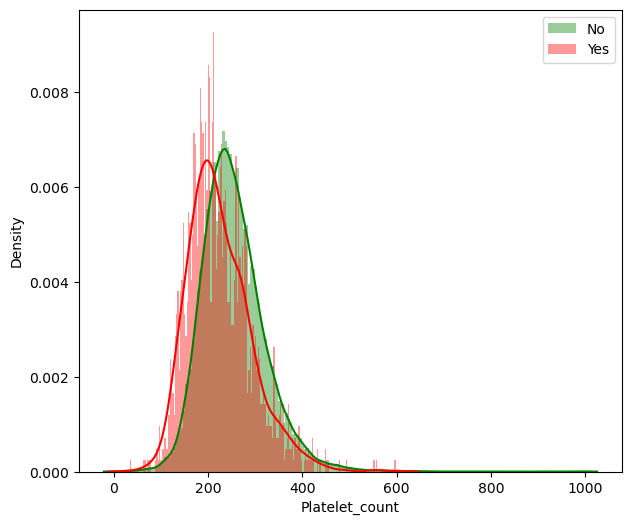

In [22]:
n = len(df['Platelet_count'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Platelet_count'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Platelet_count'].max() - df['Platelet_count'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Platelet_count[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Platelet_count[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


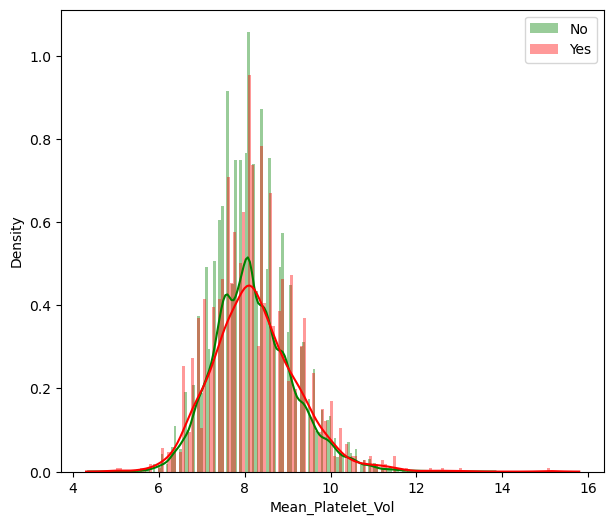

In [23]:
n = len(df['Mean_Platelet_Vol'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Mean_Platelet_Vol'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Mean_Platelet_Vol'].max() - df['Mean_Platelet_Vol'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Mean_Platelet_Vol[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Mean_Platelet_Vol[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


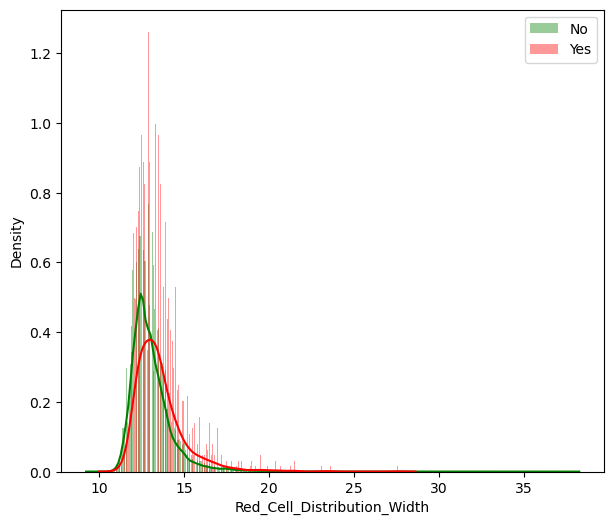

In [24]:
n = len(df['Red_Cell_Distribution_Width'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Red_Cell_Distribution_Width'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Red_Cell_Distribution_Width'].max() - df['Red_Cell_Distribution_Width'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Red_Cell_Distribution_Width[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Red_Cell_Distribution_Width[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


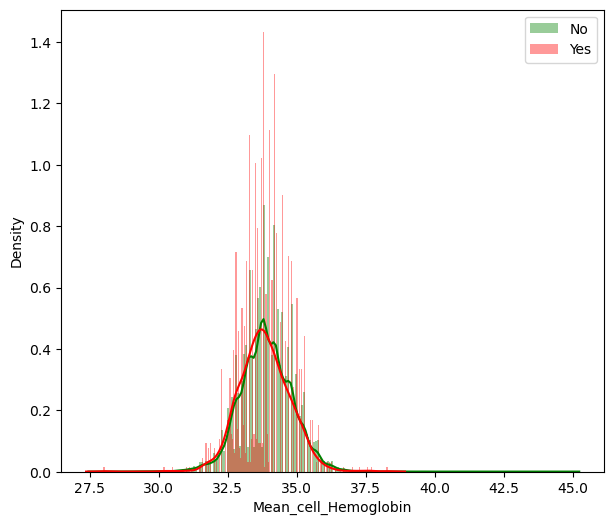

In [25]:
n = len(df['Mean_cell_Hemoglobin'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Mean_cell_Hemoglobin'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Mean_cell_Hemoglobin'].max() - df['Mean_cell_Hemoglobin'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Mean_cell_Hemoglobin[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Mean_cell_Hemoglobin[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


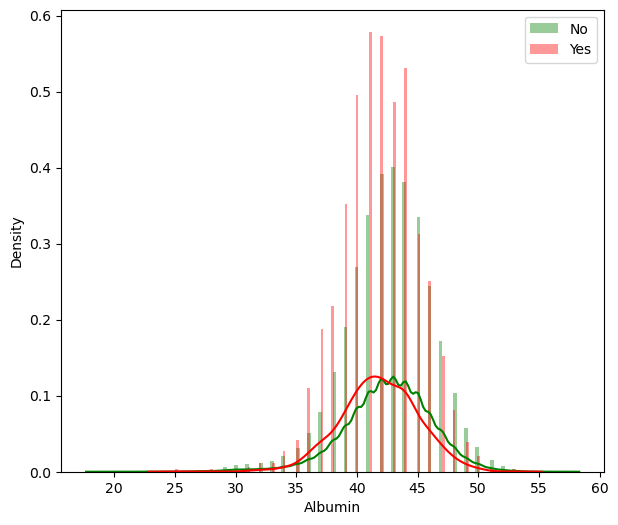

In [26]:
n = len(df['Albumin'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Albumin'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Albumin'].max() - df['Albumin'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Albumin[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Albumin[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


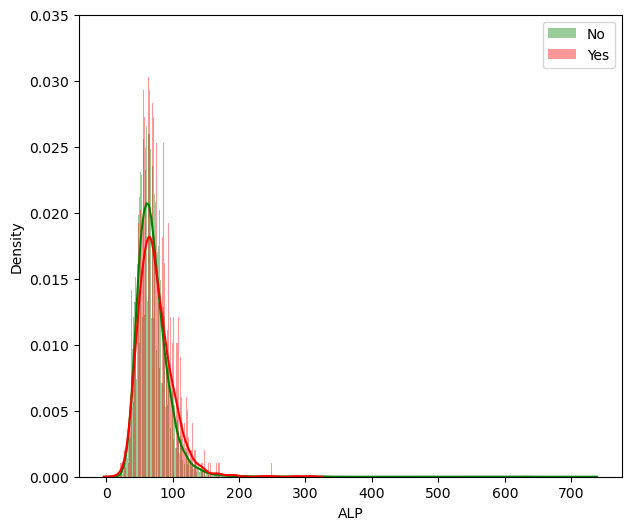

In [27]:
n = len(df['ALP'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['ALP'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['ALP'].max() - df['ALP'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.ALP[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.ALP[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


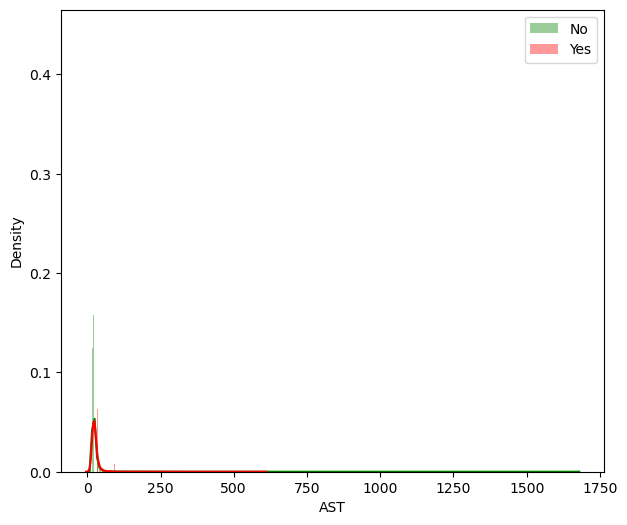

In [28]:
n = len(df['AST'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['AST'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['AST'].max() - df['AST'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.AST[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.AST[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


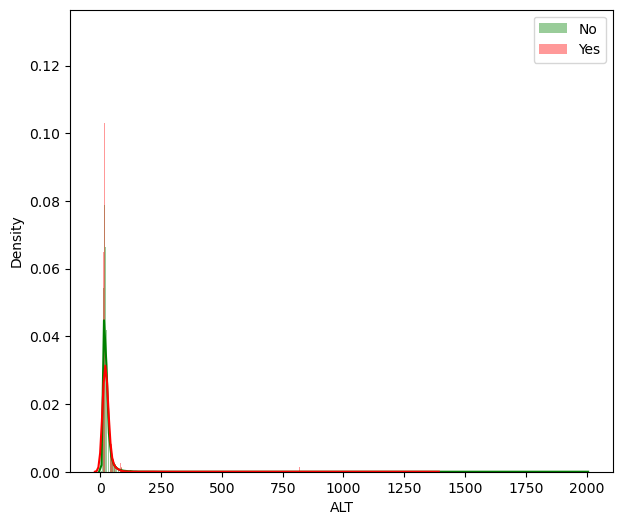

In [29]:
n = len(df['ALT'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['ALT'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['ALT'].max() - df['ALT'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.ALT[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.ALT[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


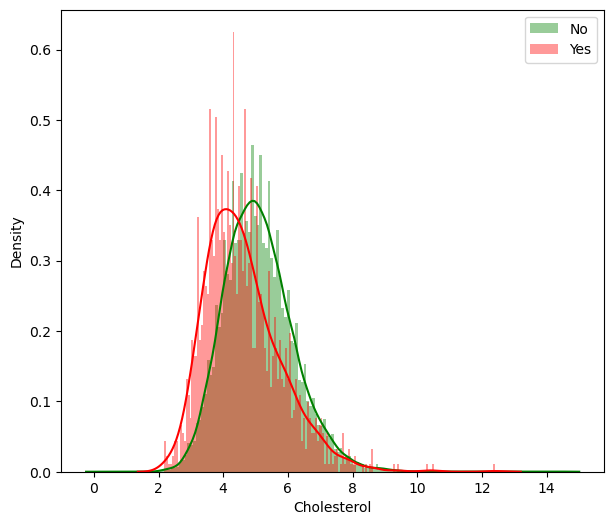

In [30]:
n = len(df['Cholesterol'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Cholesterol'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Cholesterol'].max() - df['Cholesterol'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Cholesterol[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Cholesterol[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


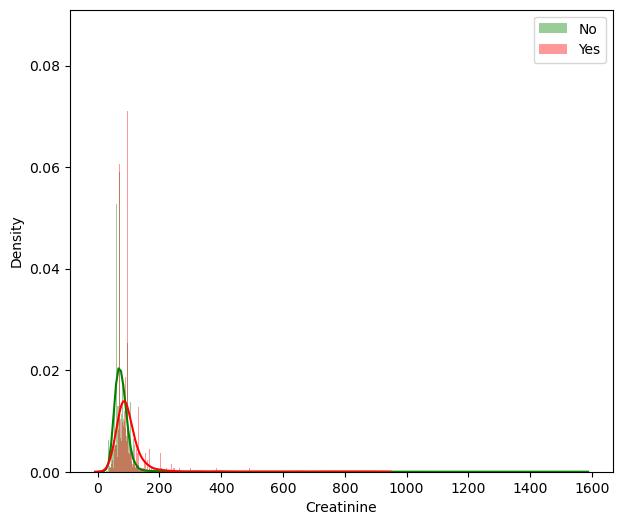

In [31]:
n = len(df['Creatinine'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Creatinine'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Creatinine'].max() - df['Creatinine'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Creatinine[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Creatinine[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


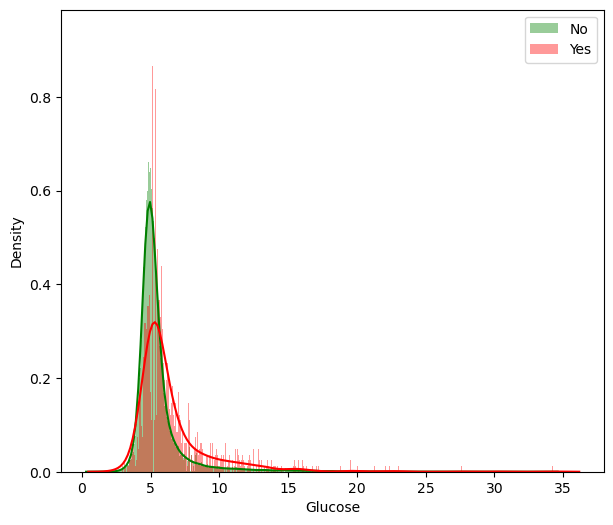

In [32]:
n = len(df['Glucose'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Glucose'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Glucose'].max() - df['Glucose'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Glucose[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Glucose[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


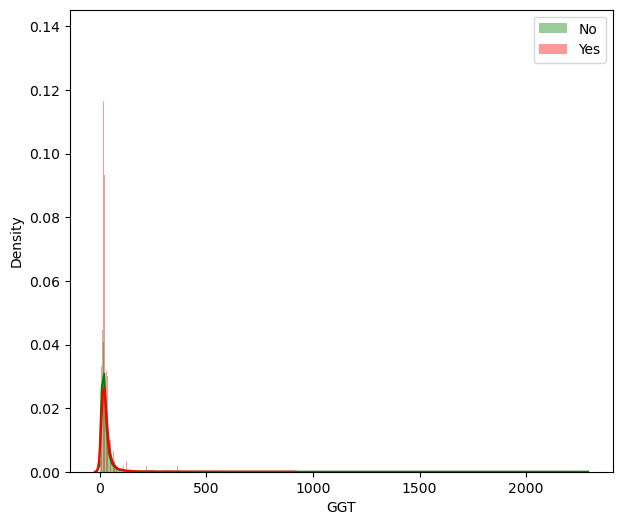

In [33]:
n = len(df['GGT'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['GGT'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['GGT'].max() - df['GGT'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.GGT[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.GGT[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


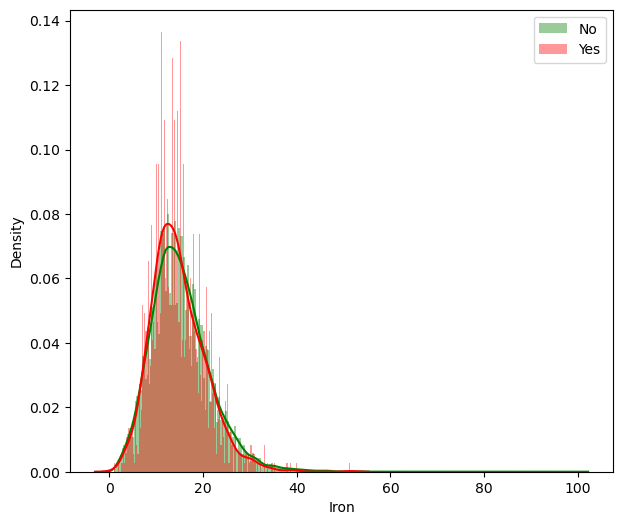

In [34]:
n = len(df['Iron'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Iron'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Iron'].max() - df['Iron'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Iron[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Iron[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


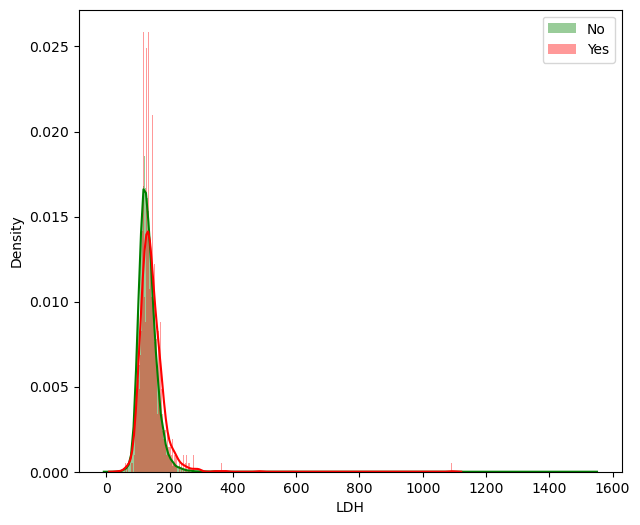

In [35]:
n = len(df['LDH'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['LDH'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['LDH'].max() - df['LDH'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.LDH[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.LDH[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


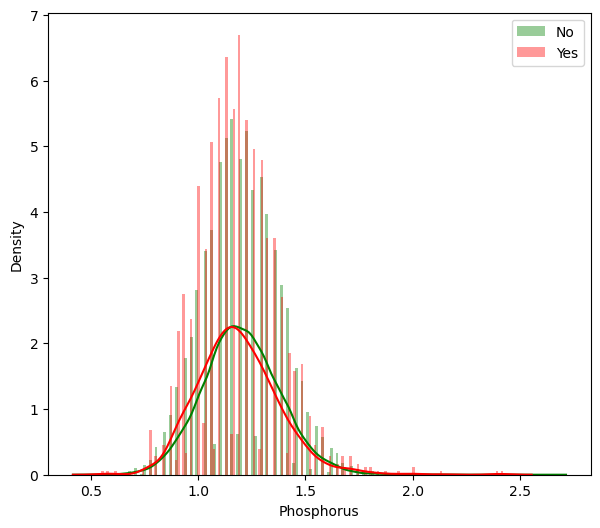

In [36]:
n = len(df['Phosphorus'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Phosphorus'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Phosphorus'].max() - df['Phosphorus'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Phosphorus[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Phosphorus[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


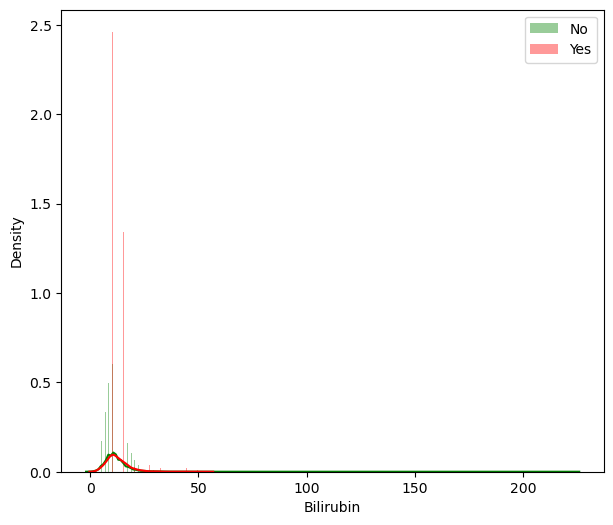

In [37]:
n = len(df['Bilirubin'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Bilirubin'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Bilirubin'].max() - df['Bilirubin'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Bilirubin[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Bilirubin[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


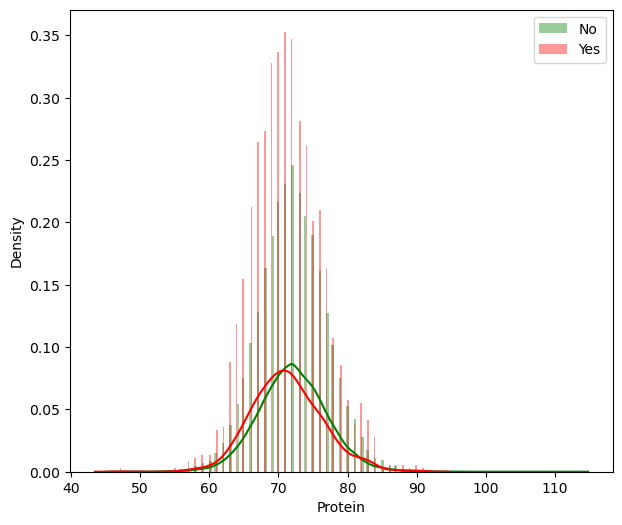

In [38]:
n = len(df['Protein'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Protein'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Protein'].max() - df['Protein'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Protein[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Protein[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


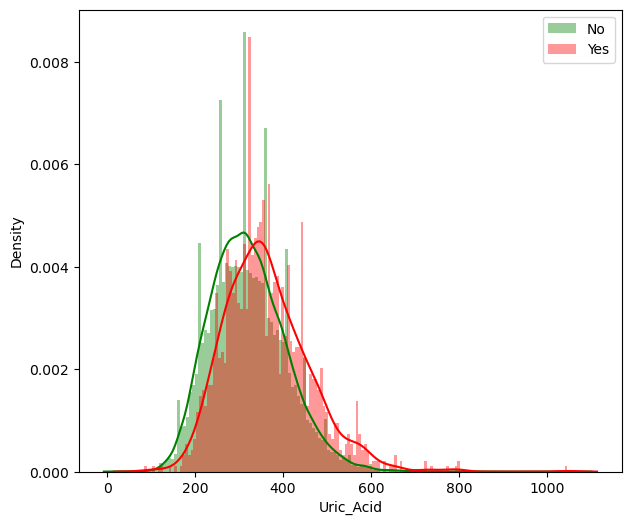

In [39]:
n = len(df['Uric_Acid'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Uric_Acid'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Uric_Acid'].max() - df['Uric_Acid'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Uric_Acid[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Uric_Acid[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


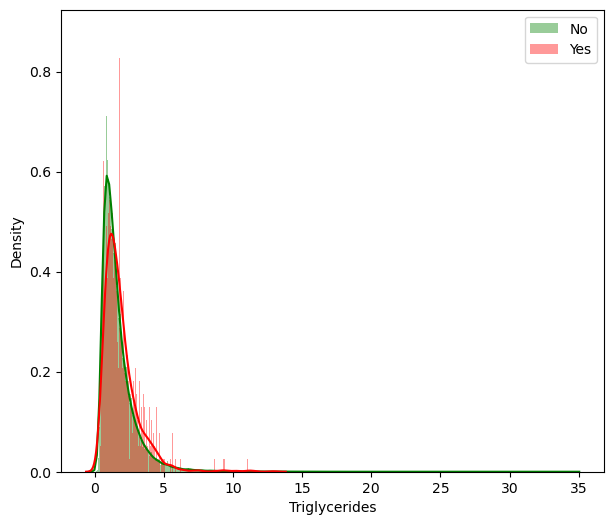

In [40]:
n = len(df['Triglycerides'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Triglycerides'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Triglycerides'].max() - df['Triglycerides'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Triglycerides[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Triglycerides[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


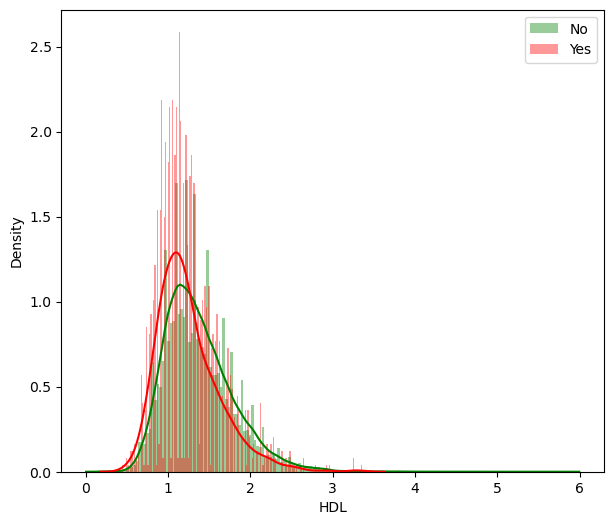

In [41]:
n = len(df['HDL'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['HDL'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['HDL'].max() - df['HDL'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.HDL[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.HDL[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


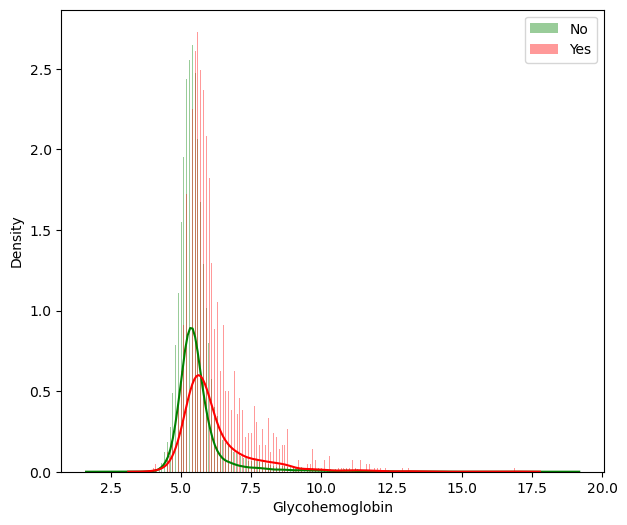

In [42]:
n = len(df['Glycohemoglobin'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Glycohemoglobin'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Glycohemoglobin'].max() - df['Glycohemoglobin'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Glycohemoglobin[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Glycohemoglobin[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

### Hubungan fitur-fitur kategorikal dengan target

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-p

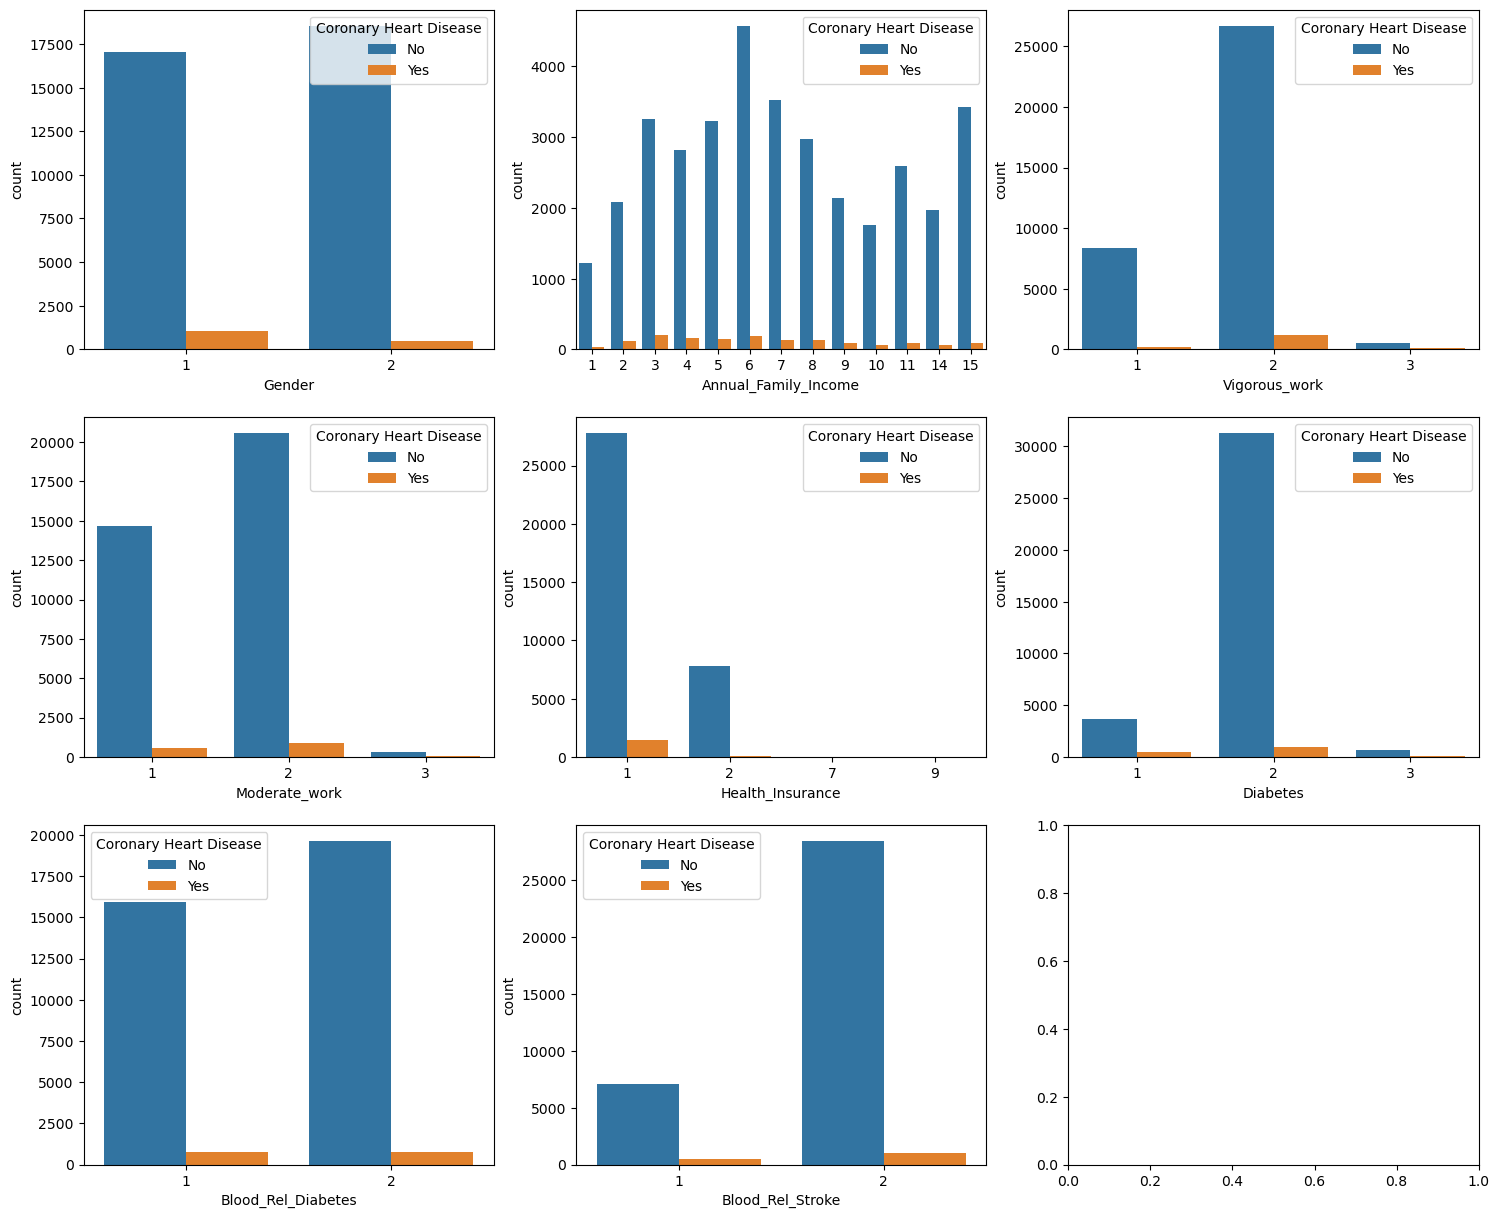

In [43]:
cat_var = ['Gender', 'Annual_Family_Income', 'Vigorous_work', 'Moderate_work', 'Health_Insurance', 'Diabetes', 
           'Blood_Rel_Diabetes', 'Blood_Rel_Stroke']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
for categoric, ax in zip(cat_var, axes.flatten()):
    sns.countplot(categoric, data=df, hue="CoronaryHeartDisease", ax=ax)
    ax.legend(title='Coronary Heart Disease', labels=['No', 'Yes'])

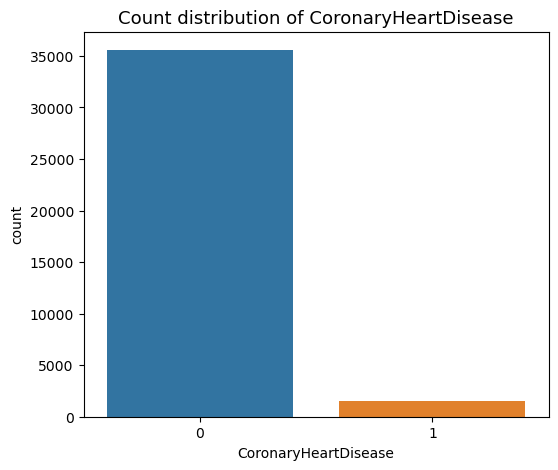

In [44]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(6, 5), facecolor='w')

sns.countplot(x="CoronaryHeartDisease", data=df)
plt.title("Count distribution of CoronaryHeartDisease", size=13)

plt.show()

## 4. Pre-Processing

In [45]:
df.describe()

,Gender,Age,Annual_Family_Income,Ratio_Family_Income_Poverty,X60_sec_pulse,Systolic,Diastolic,Weight,Height,Body_Mass_Index,White_Blood_Cells,Lymphocyte,Monocyte,Eosinophils,Basophils,Red_Blood_Cells,Hemoglobin,Mean_Cell_Vol,Mean_Cell_Hgb_Conc.,Mean_cell_Hemoglobin,Platelet_count,Mean_Platelet_Vol,Segmented_Neutrophils,Hematocrit,Red_Cell_Distribution_Width,Albumin,ALP,AST,ALT,Cholesterol,Creatinine,Glucose,GGT,Iron,LDH,Phosphorus,Bilirubin,Protein,Uric_Acid,Triglycerides,Total_Cholesterol,LDL,HDL,Glycohemoglobin,Vigorous_work,Moderate_work,Health_Insurance,Diabetes,Blood_Rel_Diabetes,Blood_Rel_Stroke,CoronaryHeartDisease
count,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000
mean,1.513282,48.943661,7.358208,2.559026,72.579250,124.090078,69.919253,80.988276,167.389601,28.824588,7.269524,30.225459,7.915710,2.833415,0.700906,4.668632,14.139073,89.534540,30.365387,33.897452,253.012886,8.196637,58.372284,41.695175,13.082278,42.528116,70.789611,25.722511,25.601850,5.077399,78.632276,5.595013,29.459667,15.266181,132.045632,1.203049,11.801173,72.050158,321.723326,1.695405,5.081713,2.863667,1.370344,5.676496,1.783840,1.598856,1.218587,1.907333,1.549502,1.796165,0.040670
std,0.499830,18.010440,3.994083,1.624789,12.242108,19.254741,13.575804,20.678734,10.122908,6.608982,2.478754,8.590412,2.324364,2.116698,0.474369,0.509368,1.541599,5.745514,2.336812,0.932481,67.403298,0.923022,9.581765,4.374323,1.304517,3.585254,26.073559,19.695625,25.889693,1.079629,39.157384,2.059786,43.576787,6.416872,31.961662,0.182223,5.276652,4.967992,86.129723,1.283654,1.072682,0.953910,0.415985,1.050223,0.448324,0.511199,0.461102,0.349674,0.497550,0.402853,0.197527
min,1.000000,20.000000,1.000000,0.000000,32.000000,0.000000,0.000000,32.300000,129.700000,13.180000,1.400000,2.700000,0.600000,0.000000,0.000000,2.260000,5.800000,50.800000,14.600000,27.800000,4.000000,4.700000,0.800000,19.700000,9.700000,19.000000,7.000000,7.000000,4.000000,0.155000,17.700000,1.050000,3.000000,0.900000,4.000000,0.484000,0.000000,47.000000,23.800000,0.102000,1.530000,-10.826000,0.160000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,33.000000,4.000000,1.140000,64.000000,111.000000,62.000000,66.500000,160.000000,24.220000,5.700000,24.400000,6.400000,1.500000,0.400000,4.320000,13.100000,86.700000,29.300000,33.300000,208.000000,7.600000,52.400000,38.700000,12.300000,40.000000,55.000000,19.000000,16.000000,4.319000,61.880000,4.718000,14.000000,10.900000,113.000000,1.098000,8.550000,69.000000,261.700000,0.903000,4.320000,2.217500,1.070000,5.200000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,48.000000,7.000000,2.180000,72.000000,121.000000,70.000000,78.200000,167.100000,27.800000,6.900000,29.700000,7.700000,2.300000,0.600000,4.660000,14.100000,89.900000,30.600000,33.861696,246.000000,8.100000,58.800000,41.800000,12.800000,43.000000,67.000000,23.000000,21.000000,4.991000,73.370000,5.110000,20.000000,14.500000,128.000000,1.195000,10.260000,72.000000,315.200000,1.344000,5.020000,2.805000,1.290000,5.400000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.000000
75%,2.000000,63.000000,10.000000,4.130000,80.000000,134.000000,78.000000,92.100000,174.600000,32.100000,8.400000,35.500000,9.100000,3.500000,0.900000,5.010000,15.200000,93.000000,31.700000,34.500000,290.000000,8.800000,64.800000,44.800000,13.500000,45.000000,8

<AxesSubplot:xlabel='Gender', ylabel='Age'>

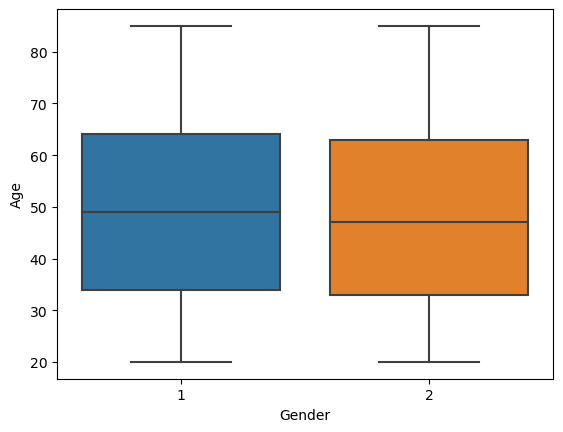

In [74]:
sns.boxplot(x="Gender", y="Age", data=df)

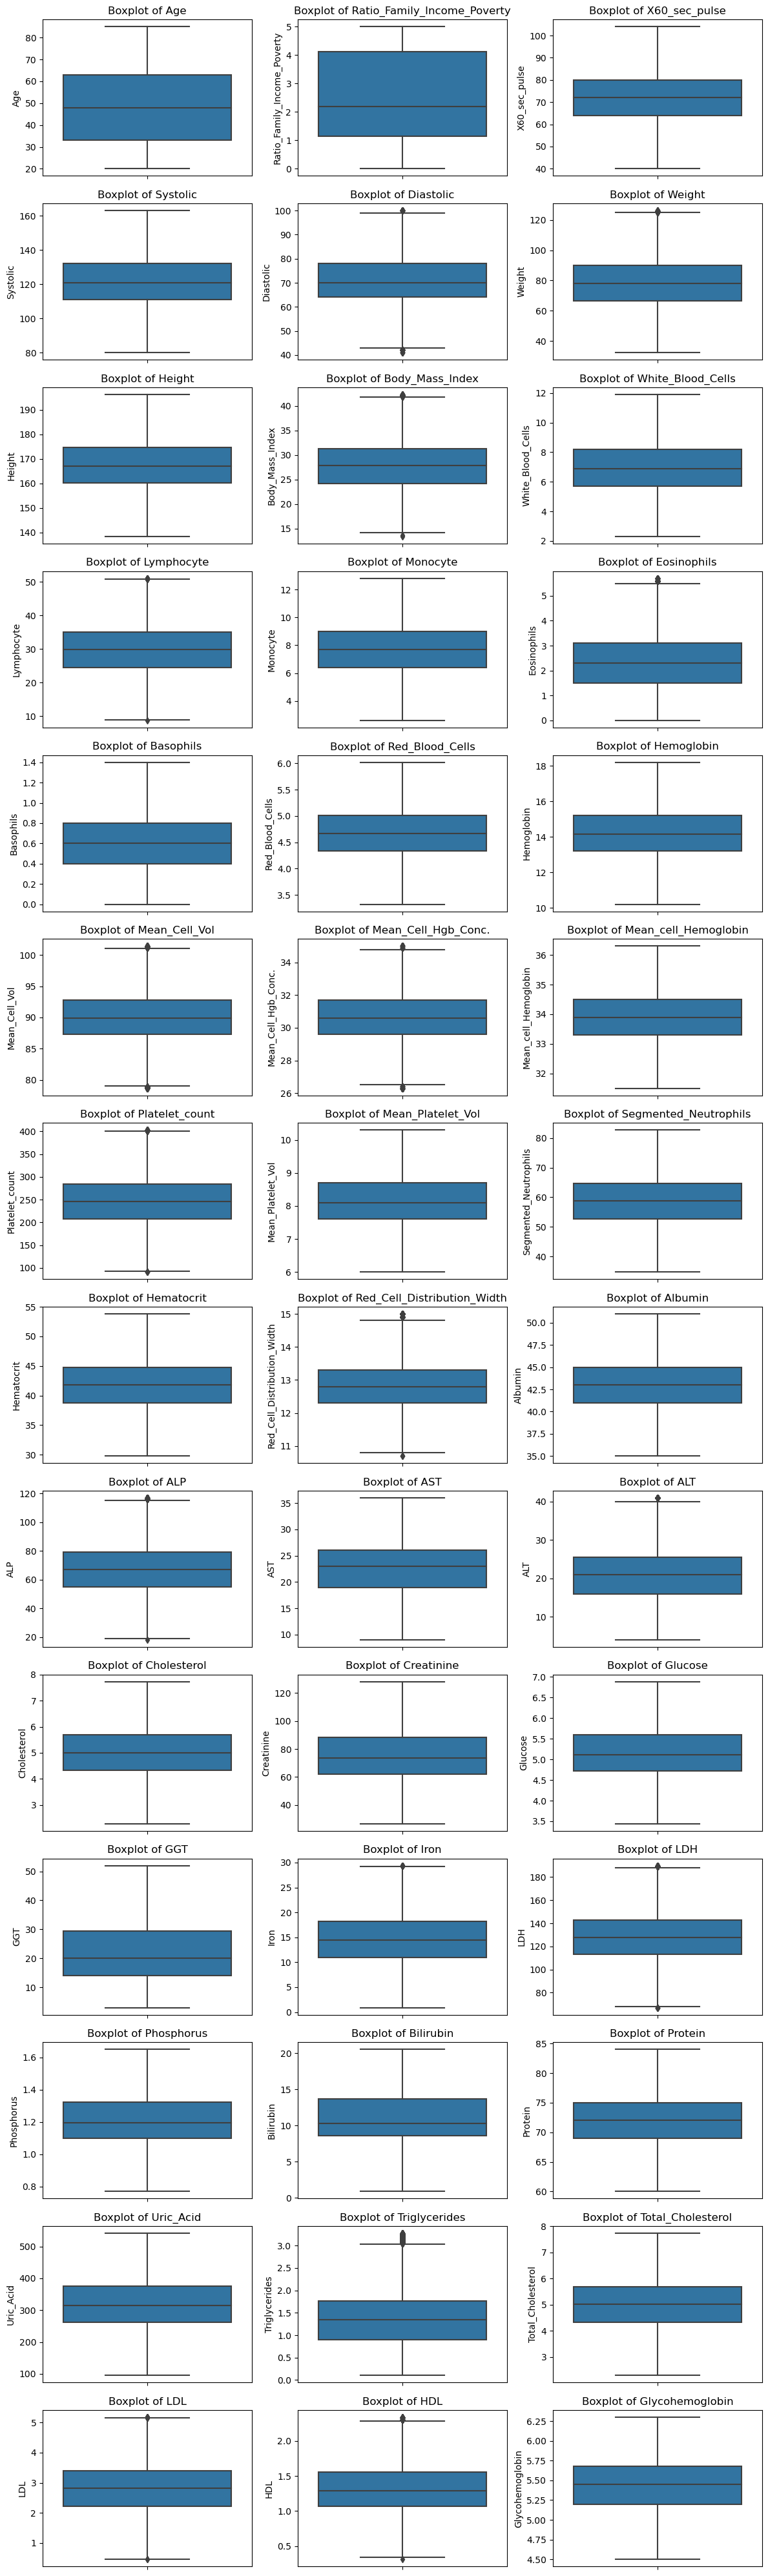

In [105]:
# List of variables to check for outliers
variables = ['Age', 'Ratio_Family_Income_Poverty', 'X60_sec_pulse', 'Systolic', 'Diastolic', 'Weight', 'Height', 
             'Body_Mass_Index', 'White_Blood_Cells', 'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red_Blood_Cells', 
             'Hemoglobin', 'Mean_Cell_Vol', 'Mean_Cell_Hgb_Conc.', 'Mean_cell_Hemoglobin', 'Platelet_count', 
             'Mean_Platelet_Vol', 'Segmented_Neutrophils','Hematocrit', 'Red_Cell_Distribution_Width', 'Albumin', 'ALP', 'AST', 
             'ALT', 'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 
             'Uric_Acid', 'Triglycerides', 'Total_Cholesterol', 'LDL', 'HDL', 'Glycohemoglobin']

# Function to detect and replace outliers using mean
def replace_outliers_with_mean(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        mean_value = df[column].mean()
        
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mean_value
    return df

# Replace outliers with mean
df = replace_outliers_with_mean(df, variables)

# Visualize outliers using boxplot after replacing with mean
plt.figure(figsize=(12, 40)) 
for i, variable in enumerate(variables):
    plt.subplot(14, 3, i + 1)
    sns.boxplot(y=df[variable])
    plt.title(f'Boxplot of {variable}')
plt.tight_layout()
plt.show()

## Dataset Splitting

In [93]:
X = df.drop(columns='CoronaryHeartDisease') #x atribut yang mempengaruhi CoronaryHeartDisease (independent variable)
y = df['CoronaryHeartDisease'] #y atribut label (dependent)

In [94]:
df['CoronaryHeartDisease'].value_counts()

0    35571
1     1508
Name: CoronaryHeartDisease, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split

X_main, X_test, y_main, y_test = train_test_split(X, y,
                                                  test_size = 0.1, 
                                                  stratify = y, #memastikan bahwa split antara train dan test memiliki proporsi kelas yang sama dengan set data asli.
                                                  random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_main, y_main, 
                                                  test_size=0.1, 
                                                  stratify=y_main, 
                                                  random_state=42)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((30033, 50), (3338, 50), (3708, 50), (30033,), (3338,), (3708,))

In [96]:
y_train.value_counts()

0    28812
1     1221
Name: CoronaryHeartDisease, dtype: int64

In [97]:
X_train.describe()

,Gender,Age,Annual_Family_Income,Ratio_Family_Income_Poverty,X60_sec_pulse,Systolic,Diastolic,Weight,Height,Body_Mass_Index,White_Blood_Cells,Lymphocyte,Monocyte,Eosinophils,Basophils,Red_Blood_Cells,Hemoglobin,Mean_Cell_Vol,Mean_Cell_Hgb_Conc.,Mean_cell_Hemoglobin,Platelet_count,Mean_Platelet_Vol,Segmented_Neutrophils,Hematocrit,Red_Cell_Distribution_Width,Albumin,ALP,AST,ALT,Cholesterol,Creatinine,Glucose,GGT,Iron,LDH,Phosphorus,Bilirubin,Protein,Uric_Acid,Triglycerides,Total_Cholesterol,LDL,HDL,Glycohemoglobin,Vigorous_work,Moderate_work,Health_Insurance,Diabetes,Blood_Rel_Diabetes,Blood_Rel_Stroke
count,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000,30033.000000
mean,1.514268,48.973895,7.368595,2.565847,72.542870,124.147072,69.877435,80.833863,167.334918,28.790316,7.254140,30.252908,7.916052,2.844684,0.701259,4.665807,14.133144,89.561106,30.371358,33.894687,253.005457,8.195885,58.333273,41.681743,13.080958,42.540206,70.723238,25.644424,25.435588,5.078761,78.609737,5.591907,29.386775,15.257995,132.019512,1.203124,11.784603,72.052502,321.432168,1.693568,5.083399,2.865521,1.371094,5.677665,1.782905,1.600606,1.216429,1.908434,1.551493,1.796857
std,0.499805,18.038176,3.983641,1.623090,12.206464,19.275560,13.633911,20.560682,10.123100,6.582304,2.406477,8.604919,2.325300,2.121357,0.476134,0.508247,1.536862,5.749482,2.333455,0.934899,67.277512,0.921756,9.585578,4.362987,1.310942,3.577933,26.402080,18.875667,23.555680,1.077158,38.594001,2.048870,43.803269,6.389777,31.014096,0.182056,5.270682,4.974125,85.875823,1.286075,1.071150,0.952664,0.417525,1.051661,0.450261,0.511465,0.456091,0.350061,0.497350,0.402345
min,1.000000,20.000000,1.000000,0.000000,32.000000,0.000000,0.000000,32.300000,130.400000,13.180000,1.500000,2.700000,0.600000,0.000000,0.000000,2.260000,5.800000,50.800000,14.600000,27.800000,11.000000,4.700000,1.000000,19.700000,9.700000,19.000000,7.000000,7.000000,4.000000,0.155000,17.700000,1.050000,3.000000,0.900000,4.000000,0.484000,0.000000,47.000000,23.800000,0.102000,1.530000,-10.826000,0.160000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,34.000000,4.000000,1.140000,64.000000,111.000000,62.000000,66.300000,160.000000,24.200000,5.700000,24.500000,6.400000,1.500000,0.400000,4.320000,13.100000,86.700000,29.300000,33.300000,208.000000,7.600000,52.300000,38.700000,12.300000,40.000000,55.000000,19.000000,16.000000,4.319000,61.880000,4.718000,14.000000,10.900000,113.000000,1.098000,8.550000,69.000000,261.700000,0.903000,4.320000,2.221500,1.080000,5.200000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000
50%,2.000000,48.000000,7.000000,2.180000,72.000000,121.000000,70.000000,78.100000,167.100000,27.780000,6.900000,29.800000,7.700000,2.300000,0.600000,4.650000,14.100000,90.000000,30.600000,33.855067,246.000000,8.100000,58.700000,41.700000,12.800000,43.000000,67.000000,23.000000,21.000000,4.991000,73.370000,5.110000,20.000000,14.500000,128.000000,1.195000,10.260000,72.000000,315.200000,1.344000,5.020000,2.804000,1.290000,5.400000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
75%,2.000000,63.000000,10.000000,4.130000,80.000000,134.000000,78.000000,91.900000,174.600000,32.100000,8.400000,35.500000,9.100000,3.600000,0.900000,5.010000,15.200000,93.000000,31.800000,34.500000,290.000000,8.800000,64.700000,44.800000,13.500000,45.000000,82.000000,27.000000,28.000000,5.741000,88.400000,5.662000,31.000000,18.800000,1

In [98]:
X_train.columns

Index(['Gender', 'Age', 'Annual_Family_Income', 'Ratio_Family_Income_Poverty',
       'X60_sec_pulse', 'Systolic', 'Diastolic', 'Weight', 'Height',
       'Body_Mass_Index', 'White_Blood_Cells', 'Lymphocyte', 'Monocyte',
       'Eosinophils', 'Basophils', 'Red_Blood_Cells', 'Hemoglobin',
       'Mean_Cell_Vol', 'Mean_Cell_Hgb_Conc.', 'Mean_cell_Hemoglobin',
       'Platelet_count', 'Mean_Platelet_Vol', 'Segmented_Neutrophils',
       'Hematocrit', 'Red_Cell_Distribution_Width', 'Albumin', 'ALP', 'AST',
       'ALT', 'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH',
       'Phosphorus', 'Bilirubin', 'Protein', 'Uric_Acid', 'Triglycerides',
       'Total_Cholesterol', 'LDL', 'HDL', 'Glycohemoglobin', 'Vigorous_work',
       'Moderate_work', 'Health_Insurance', 'Diabetes', 'Blood_Rel_Diabetes',
       'Blood_Rel_Stroke'],
      dtype='object')

## Training to get the hyperparameter

In [99]:
import logging
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV

from jcopml.tuning import grid_search_params as gsp
from jcopml.tuning import random_search_params as rsp
from jcopml.tuning import bayes_search_params as bsp

from jcopml.tuning.space import Integer, Real
from skopt.space import Categorical

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, space_eval
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Random Forest

In [100]:
gbc_search_space = {
    'max_depth': hp.quniform('max_depth', 1, 10, 1),
    'learning_rate': hp.loguniform('learning_rate' ,-2, 0),
    'n_estimators': hp.quniform('n_estimators', 100, 200, 1),
    'subsample': hp.uniform('subsample', 0.3, 0.8),
    'loss': hp.choice('loss', ['deviance', 'exponential']),
    'criterion': hp.choice('criterion', ['friedman_mse', 'squared_error']),
    'max_features': hp.choice('max_features', ['sqrt', 'log2']),
    'threshold': hp.uniform('threshold', 0, 1)  # Penambahan threshold sebagai hyperparameter
}

rfc_search_space = {
    'algo__n_estimators': Integer(low=100, high=200),
    'algo__max_depth': Integer(low=20, high=80),
    'algo__max_features': Categorical(['sqrt', 'log2', None]),
    'algo__min_samples_leaf': Integer(low=1, high=20),
    'algo__min_samples_split': Integer(low=2, high=20),
    'algo__bootstrap': Categorical([True, False]),
    'algo__criterion': Categorical(["gini", "entropy"]) 
}

In [101]:
# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


preprocessor = ColumnTransformer([
     ('numeric', num_pipe(), ['Age', 'Ratio_Family_Income_Poverty', 'X60_sec_pulse', 'Systolic', 'Diastolic', 'Weight', 
                              'Height', 'Body_Mass_Index', 'White_Blood_Cells', 'Lymphocyte', 'Monocyte', 'Eosinophils', 
                              'Basophils', 'Red_Blood_Cells', 'Hemoglobin', 'Mean_Cell_Vol', 'Mean_Cell_Hgb_Conc.', 
                              'Mean_cell_Hemoglobin', 'Platelet_count', 'Mean_Platelet_Vol', 'Segmented_Neutrophils', 
                              'Hematocrit', 'Red_Cell_Distribution_Width', 'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol', 
                              'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric_Acid', 
                              'Triglycerides', 'Total_Cholesterol', 'LDL', 'HDL', 'Glycohemoglobin']),
   
    ('categoric', cat_pipe(), ['Gender', 'Annual_Family_Income', 'Vigorous_work', 'Moderate_work', 'Health_Insurance', 'Diabetes', 
                               'Blood_Rel_Diabetes', 'Blood_Rel_Stroke'])
])


# n_jobs = mau brp core yang digunakan untuk memproses
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GradientBoostingClassifier(random_state=42))
])


def objective(rfc_search_space):
    # Convert 'algo__...' keys to just their actual parameter names if using a Pipeline
    params = {k.replace('algo__', ''): v for k, v in params.items()}
    clf = GradientBoostingClassifier(**params)
    # Your code to train and evaluate the model here


# Mendefinisikan Fungsi Obyektif
# Define objective function
def objective(space):
    model = pipeline.set_params(algo__max_depth=int(space['max_depth']),
                                algo__learning_rate=float(space['learning_rate']),
                                algo__n_estimators=int(space['n_estimators']),
                                algo__subsample=float(space['subsample']),
                                algo__loss=space['loss'],
                                algo__criterion=space['criterion'],
                                algo__max_features=space['max_features'])
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    score = -cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1', n_jobs=-1).mean()
    return {'loss': score, 'status': STATUS_OK}

# Optimization
trials = Trials()
best = fmin(objective,
            space=gbc_search_space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

print("Best hyperparameters:", best)

  0%|                                                                           | 0/20 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 0 trials


  0%|                                                                           | 0/20 [00:04<?, ?trial/s, best loss=?]


KeyboardInterrupt: 

In [ ]:
# Assuming `best` is the dictionary containing the best parameters found by Hyperopt
# We need to adjust the parameter names and types if necessary before using them
best_params = {
    'max_depth': int(best['max_depth']),
    'learning_rate': float(best['learning_rate']),
    'n_estimators': int(best['n_estimators']),
    'subsample': float(best['subsample']),
    'loss': ['deviance', 'exponential'][best['loss']],
    'max_features': ['sqrt', 'log2'][best['max_features']],
    'criterion': ['friedman_mse', 'squared_error'][best['criterion']]
}


# Inisialisasi Random Forest Classifier dengan hyperparameter terbaik
gbc = GradientBoostingClassifier(random_state=42, **best_params)


# Fit the Random Forest Classifier ke Training Set
gbc.fit(X_train, y_train)


print(f"Training Accuracy: {gbc.score(X_train, y_train)}")

# Evaluasi pada Validation Set
y_val_pred = gbc.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")


# Making Predictions on the Testing Set
y_pred = gbc.predict(X_test)
# Evaluating the Accuracy of the Random Forest Classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Mendapatkan probabilitas prediksi
y_pred_proba = gbc.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Plot Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Menemukan threshold optimal berdasarkan ROC atau Precision-Recall Curve
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('Optimal Threshold (ROC):', optimal_threshold)

# Menerapkan threshold yang disesuaikan pada prediksi probabilitas
y_pred_adjusted = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluasi model dengan threshold yang disesuaikan
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

print('Confusion Matrix:')
print(conf_matrix)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

In [ ]:
gb_conf_matrix = confusion_matrix(y_test, y_pred)
gb_acc_score = accuracy_score(y_test, y_pred)

#confussion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

print("confussion matrix")
print(gb_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting:",gb_acc_score*100,'\n')
print(classification_report(y_test,y_pred))

### Gradient Boosting

### Model 2

## Resampling imbalanced dataset by oversampling positive cases Using SMOTE

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
# from imblearn.combine import SMOTETomek
# from imblearn.combine import SMOTEENN

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())

smote = SMOTE(sampling_strategy = 'minority', random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
# Apply SMOTEENN to training data
# smote_enn = SMOTEENN(random_state=42)
# X_train_sm, y_train_sm = smote_enn.fit_resample(X_train, y_train)

print(X_train_sm.shape)
print(X_test.shape)
print(y_train_sm.shape)
print(y_train_sm.value_counts())

In [ ]:
X_train_sm

In [ ]:
from collections import Counter

labels = Counter(y_train_sm)
print("y labels after oversampling")
print(labels)

In [ ]:
colors = ['#3274A1', '#E1812C']
pd.Series(y_train_sm).value_counts().plot(kind='bar', 
                                    title='Distribusi Class CoronaryHeartDisease setelah diterapkan SMOTE', 
                                    xlabel='CoronaryHeartDisease',
                                    color=colors)
plt.xticks(rotation=360)

In [ ]:
# Combine the resampled minority class with the majority class
resampled_data = pd.concat([X_train_sm, y_train_sm], axis=1)

are_rows_equal = resampled_data.duplicated().any()

if are_rows_equal:
    print("Ada baris yang sama di antara kedua dataframe.")
else:
    print("Tidak ada baris yang sama di antara kedua dataframe.")

# Mengecek duplikasi setelah resampling
print("Jumlah baris duplikat setelah resampling:", resampled_data.duplicated().sum())

In [ ]:
# X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_trainsm, y_sm, 
#                                                                 test_size = 0.4,
#                                                                 stratify = y, #memastikan bahwa split antara train dan test memiliki proporsi kelas yang sama dengan set data asli.
#                                                                 random_state = 42)
# X_train_sm.shape, X_test_sm.shape, y_train_sm.shape, y_test_sm.shape

In [ ]:
print(X_train_sm.shape)
print(X_test.shape)
print(y_train_sm.shape)
print(y_test.shape)

In [ ]:
X_train_sm

## Feature Selection

### 1. filter method - Information Gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
# Menghitung Information Gain untuk setiap fitur
info_gains = mutual_info_classif(X_train_sm, y_train_sm)

# Membuat DataFrame untuk hasil yang lebih mudah dipahami
features_info_gain = pd.DataFrame(info_gains, index=X.columns, columns=['Information Gain'])

# Menampilkan fitur diurutkan berdasarkan Information Gain
features_info_gain.sort_values(by='Information Gain', ascending=False, inplace=True)
print(features_info_gain)

### 2. wrapper method - Recursive Feature Elimination 

In [ ]:
from sklearn.feature_selection import RFE

# Inisialisasi RFE dengan model RF, memilih 10 fitur
rfe = RFE(estimator=gbc, n_features_to_select=10)

# Fit RFE
rfe.fit(X_train_sm, y_train_sm)

# Menampilkan fitur yang terpilih
# selected_features = pd.Series(rfe.support_, index=X.columns)

# print("Selected features:")
# print(selected_features[selected_features == True])
print("Num Features: %d" % rfe.n_features_)
print("Selected Features: %s" % rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)


In [ ]:
# Menampilkan fitur yang terpilih
selected_features = pd.Series(rfe.support_, index=X_train_sm.columns)

# print("Selected features:")
print(selected_features[selected_features == True])

### 3. embedded method - feature importance

In [ ]:
# Hasil Information Gain
info_gains = mutual_info_classif(X_train_sm, y_train_sm)
features_info_gain = pd.DataFrame(info_gains, index=X_train_sm.columns, columns=['Information Gain'])

# Hasil RFE
rfe = RFE(estimator=gbc, n_features_to_select=10)
rfe.fit(X_train_sm, y_train_sm)
selected_features_rfe = pd.Series(rfe.support_, index=X.columns)

# Hasil Feature Importance dari Random Forest
gb_importances = gbc.feature_importances_
features_importance_gb = pd.Series(gb_importances, index=X_train_sm.columns)
print(features_importance_gb)


In [ ]:
# Normalisasi skor Information Gain
info_gain_normalized = (features_info_gain['Information Gain'] >= features_info_gain['Information Gain'].quantile(0.90)).astype(int)

# Normalisasi skor Feature Importance
importance_normalized = (features_importance_gb >= features_importance_gb.quantile(0.90)).astype(int)


In [ ]:
# Agregasi skor
aggregated_scores = info_gain_normalized + selected_features_rfe.astype(int) + importance_normalized

# Menampilkan fitur yang paling relevan
selected_features_final = aggregated_scores[aggregated_scores == 3]  # Fitur yang dipilih oleh semua metode
print("Top selected features by all methods:")
print(selected_features_final.index)


In [ ]:
# Final aggregated feature selection
selected_by_at_least_two_methods = aggregated_scores[aggregated_scores >= 2]
print("Features selected by at least two methods:")
print(selected_by_at_least_two_methods.index)


## Menghitung korelasi

In [ ]:
#Checking relationship between variables
cor=df.corr()
plt.figure(figsize=(40,30), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

In [ ]:
from jcopml.feature_importance import mean_score_decrease
from jcopml.feature_importance import mean_loss_decrease

In [ ]:
df_imp = mean_score_decrease(X_train_sm, y_train_sm, gbc, plot=True, topk=10)

In [ ]:
# df_imp = mean_loss_decrease(X_train_sm, rfc, plot=True, topk=10)

## Training model with balanced class and feature selection applied 

In [ ]:
# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


preprocessor = ColumnTransformer([
     ('numeric', num_pipe(), ['Age', 'Ratio_Family_Income_Poverty', 'X60_sec_pulse', 'Systolic', 'Diastolic', 'Weight', 
                              'Height', 'Body_Mass_Index', 'White_Blood_Cells', 'Lymphocyte', 'Monocyte', 'Eosinophils', 
                              'Basophils', 'Red_Blood_Cells', 'Hemoglobin', 'Mean_Cell_Vol', 'Mean_Cell_Hgb_Conc.', 
                              'Mean_cell_Hemoglobin', 'Platelet_count', 'Mean_Platelet_Vol', 'Segmented_Neutrophils', 
                              'Hematocrit', 'Red_Cell_Distribution_Width', 'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol', 
                              'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric_Acid', 
                              'Triglycerides', 'Total_Cholesterol', 'LDL', 'HDL', 'Glycohemoglobin']),
   
    ('categoric', cat_pipe(), ['Gender', 'Annual_Family_Income', 'Vigorous_work', 'Moderate_work', 'Health_Insurance', 'Diabetes', 
                               'Blood_Rel_Diabetes', 'Blood_Rel_Stroke'])
])


# n_jobs = mau brp core yang digunakan untuk memproses
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GradientBoostingClassifier(random_state=42))
])


def objective(gbc_search_space):
    # Convert 'algo__...' keys to just their actual parameter names if using a Pipeline
    params = {k.replace('algo__', ''): v for k, v in params.items()}
    clf = GradientBoostingClassifier(**params)
    # Your code to train and evaluate the model here


# # Mendefinisikan Fungsi Obyektif
# # Define objective function
# def objective(space):
#     model = pipeline.set_params(algo__max_depth=int(space['max_depth']),
#                                 algo__learning_rate=float(space['learning_rate']),
#                                 algo__n_estimators=int(space['n_estimators']),
#                                 algo__subsample=float(space['subsample']),
#                                 algo__loss=space['loss'],
#                                 algo__criterion=space['criterion'],
#                                 algo__max_features=space['max_features'])
#     kfold = KFold(n_splits=5, shuffle=True, random_state=42)
#     score = -cross_val_score(model, X_train_sm, y_train_sm, cv=kfold, scoring='f1', n_jobs=-1).mean()
#     return {'loss': score, 'status': STATUS_OK}

# # Optimization
# trials = Trials()
# best = fmin(objective,
#             space=gbc_search_space,
#             algo=tpe.suggest,
#             max_evals=20,
#             trials=trials)

# print("Best hyperparameters:", best)

In [ ]:
# Fungsi tujuan untuk optimasi
def objective(params):
    # Ekstrak threshold dari params
    threshold = params['threshold']
    params = {k: int(v) if isinstance(v, float) and k in ['n_estimators', 'max_depth'] else v for k, v in params.items() if k != 'threshold'}
    
    # Buat model Gradient Boosting dengan hyperparameter yang diberikan
    model = GradientBoostingClassifier(**params)
    model.fit(X_train_sm, y_train_sm)
    
    # Dapatkan probabilitas prediksi
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Terapkan threshold yang disesuaikan pada prediksi probabilitas
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)
    
    # Hitung metrik kinerja
    accuracy = accuracy_score(y_test, y_pred_adjusted)
    precision = precision_score(y_test, y_pred_adjusted)
    recall = recall_score(y_test, y_pred_adjusted)
    f1 = f1_score(y_test, y_pred_adjusted)
    
    # Tentukan metrik tujuan (misalnya, F1 score negatif untuk minimisasi)
    return {'loss': -f1, 'status': STATUS_OK}

# Jalankan Hyperopt
trials = Trials()
best = fmin(fn=objective, space=gbc_search_space, algo=tpe.suggest, max_evals=100, trials=trials)

print('Best hyperparameters:', best)

# Membangun model dengan hyperparameter terbaik
best_threshold = best['threshold']
best_params = {
    'max_depth': int(best['max_depth']),
    'learning_rate': best['learning_rate'],
    'n_estimators': int(best['n_estimators']),
    'subsample': best['subsample'],
    'loss': ['deviance', 'exponential'][best['loss']],
    'max_features': ['sqrt', 'log2'][best['max_features']],
    'criterion': ['friedman_mse', 'squared_error'][best['criterion']]
}

model = GradientBoostingClassifier(**best_params)
model.fit(X_train_sm, y_train_sm)
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_proba >= best_threshold).astype(int)

# Evaluasi model dengan threshold yang disesuaikan
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

print('Confusion Matrix:')
print(conf_matrix)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

In [ ]:
#confussion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

print("confussion matrix")
print(conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting:",accuracy*100,'\n')
print(classification_report(y_test,y_pred_adjusted))

# **Model Evaluation**

In [ ]:
model_ev = pd.DataFrame(
    {'Model': ['Random Forest', 'Extreme Gradient Boosting'], 'Accuracy': [gb_acc_score*100, gb_acc_score*100]}
)
model_ev

In [ ]:
colors = ['salmon','Wheat']

plt.figure(figsize=(7,7), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()